In [2]:
#Imports
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

Loading the Megaset that we created by combining all the informations.

In [3]:
df_megaset = pd.read_csv('../../data/megaset.csv')
print(df_megaset['Year'].isna().sum())

49640


In [4]:
#filter the data: 
df_megaset['Name'].isna().sum()



0

## Examining the dataset (modify this part to adapt it to df_megaset)

Languages movie count

In [5]:
df_megaset.value_counts("Languages").head(10)

Languages
english                 33904
hindi                    3106
spanish                  2634
silent film, english     2298
french                   1852
japanese                 1795
italian                  1778
tamil                    1688
malayalam                1398
german                   1179
Name: count, dtype: int64

Countries movie count

In [6]:
df_megaset.value_counts("Countries").head(10)

Countries
united states of america                    30448
india                                        8292
united kingdom                               5366
japan                                        2255
france                                       1862
italy                                        1731
canada                                       1353
argentina                                    1267
united states of america, united kingdom      861
hong kong                                     853
Name: count, dtype: int64

Number of countries with more than 100 movie counts

Total number of countries : 146
Number of countries with more than 100 counts : 52


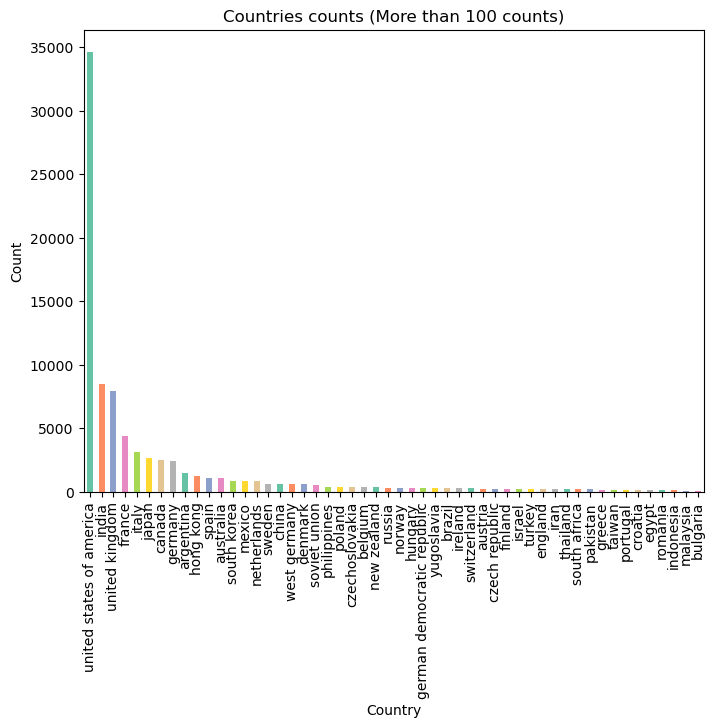

In [7]:
countries_counts = df_megaset['Countries'].str.split(', ').explode().value_counts()
print(f"Total number of countries : {len(countries_counts)}")

count_threshold = 100
filt_countries_count = countries_counts[countries_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_countries_count)}")

colors = sns.color_palette("Set2", len(filt_countries_count))
plt.figure(figsize=(8, 6))
filt_countries_count.plot(kind='bar', color=colors)
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

The vast majority of movies from the dataset come from the United States of America, and therefore becomes the focus of our project.

Number of languages with more than 40 movie counts

Total number of languages : 210
Number of countries with more than 40 counts : 60


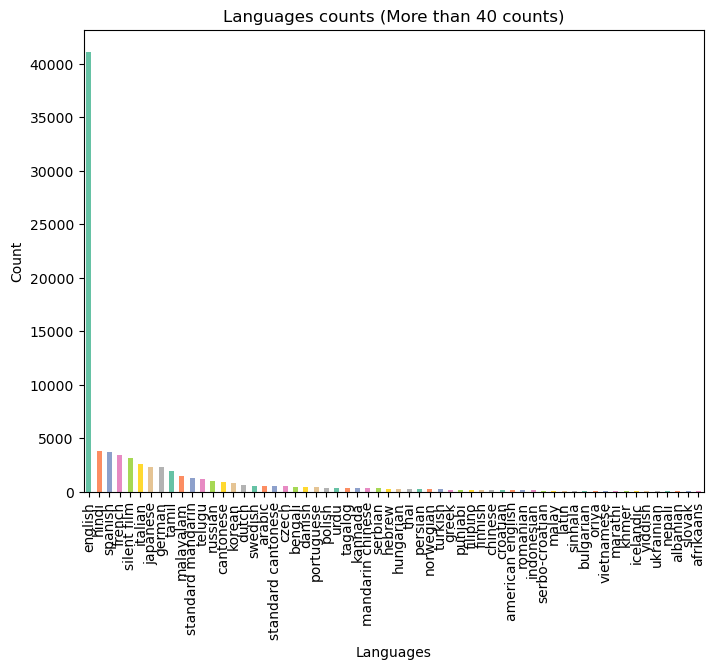

In [8]:
languages_counts = df_megaset['Languages'].str.split(', ').explode().value_counts()
print(f"Total number of languages : {len(languages_counts)}")

count_threshold = 40
filt_languages_counts = languages_counts[languages_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_languages_counts)}")

colors = sns.color_palette("Set2", len(filt_languages_counts))
plt.figure(figsize=(8, 6))
filt_languages_counts.plot(kind='bar', color=colors)
plt.title(f'Languages counts (More than {count_threshold} counts)')
plt.xlabel("Languages")
plt.ylabel("Count")
plt.show()

Due to the dominance of American movies in the dataset, it comes as no surprise that English is therefore the language at the forefront of our dataset.

Defining additional analysis functions

In [9]:
def keep_year(s):
    s = str(s)
    if s == 'nan': 
        return
    return int(s[:4])

def filter_year(year):
    if year < 1800:
        return False
    return True

Year movie count

In [10]:
df_megaset.Year = df_megaset.Year.apply(lambda x: keep_year(x))
df_megaset = df_megaset[df_megaset['Year'].apply(lambda x: filter_year(x))]
df_megaset.head()
df_megaset.Year.value_counts()

Year
2006.0    1084
2008.0    1033
2007.0    1020
2005.0     990
2009.0     898
          ... 
1891.0       3
1890.0       2
1893.0       1
1889.0       1
1888.0       1
Name: count, Length: 135, dtype: int64

The combined dataset incorporating the different sources of data mentioned in ReadMe is displayed below.

In [11]:
df_megaset

,Name,Year,Languages,Countries,Genres,Tropes,Budget,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
0,,1916.0,"silent film, hungarian",hungary,"silent film, drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!women art revolution,NaN,english,"united states of america, canada","lgbt, history, documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,##############################################...,2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,##############################################...,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#1 cheerleader camp,2010.0,NaN,united states of america,"sports, sex comedy, comedy film, comedy, teen",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87068,…all the marbles,1981.0,english,united states of america,"drama, comedy-drama, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
87069,…and there wasn’t everafter…,NaN,english,india,short film,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87070,…men olsenbanden var ikke død,1984.0,norwegian,norway,"crime fiction, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
87071,₤500 reward,1918.0,"silent film, english",NaN,silent film,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Min and Max Year and Revenue

In [12]:
print(f"Minimum year is {df_megaset.Year.min()}")
print(f"Maximum year is {df_megaset.Year.max()}")
print(f"Minimum revenue is {df_megaset.worldwide_gross.min()}")
print(f"Maximum revenue is {df_megaset.worldwide_gross.max()}")

Minimum year is 1888.0
Maximum year is 2024.0
Minimum revenue is 1961544.0
Maximum revenue is 2776345279.0


Basic Analysis on our Megaset

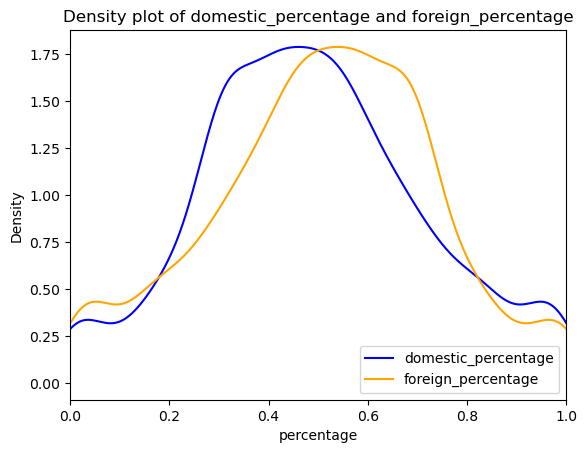

In [ ]:
df_copy = df_megaset.copy(deep=True)
df_percentage = df_copy.dropna(subset=['domestic_percentage', 'foreign_percentage'])

df_percentage.domestic_percentage.plot.density(color='blue')
df_percentage.foreign_percentage.plot.density(color='orange')

plt.title('Density plot of domestic_percentage and foreign_percentage')
plt.xlabel('percentage')
plt.xlim(0, 1)
plt.legend(["domestic_percentage", "foreign_percentage"], loc="lower right")
plt.show()

Total number of countries : 146
Number of countries with more than 500 counts : 20


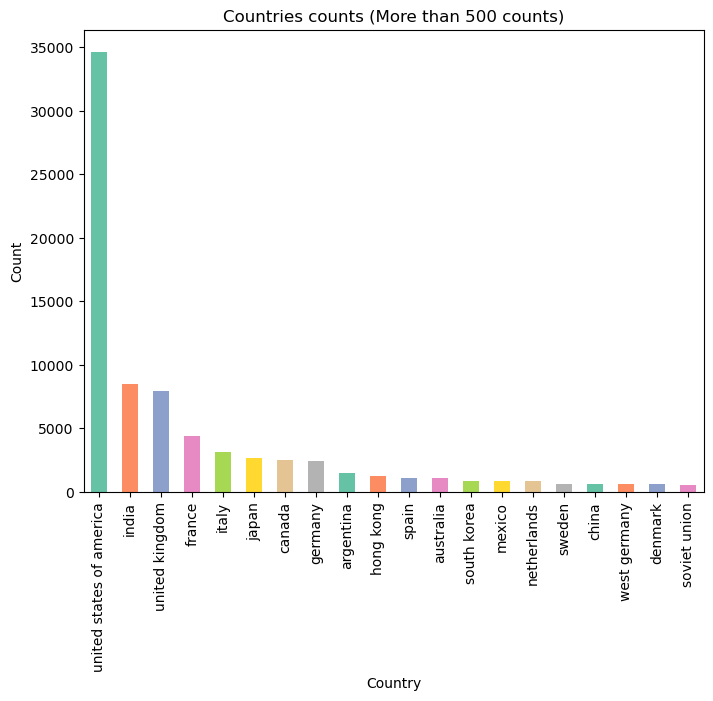

In [14]:
df_countries = df_copy.dropna(subset=['Countries'])
countries_counts = df_countries['Countries'].str.split(', ').explode().value_counts()
print(f"Total number of countries : {len(countries_counts)}")

count_threshold = 500
filt_countries_count = countries_counts[countries_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_countries_count)}")
colors = sns.color_palette("Set2", len(filt_countries_count))
plt.figure(figsize=(8, 6))
filt_countries_count.plot(kind='bar', color=colors)
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

This plot shows that the dataset contains a lot more data on the United States. Therefore our analysis will be more US based.

2024.0
Year
1888.0       1
1889.0       1
1893.0       1
1890.0       2
1891.0       3
          ... 
2009.0     898
2005.0     990
2007.0    1020
2008.0    1033
2006.0    1084
Name: count, Length: 135, dtype: int64
16
Counts of Years


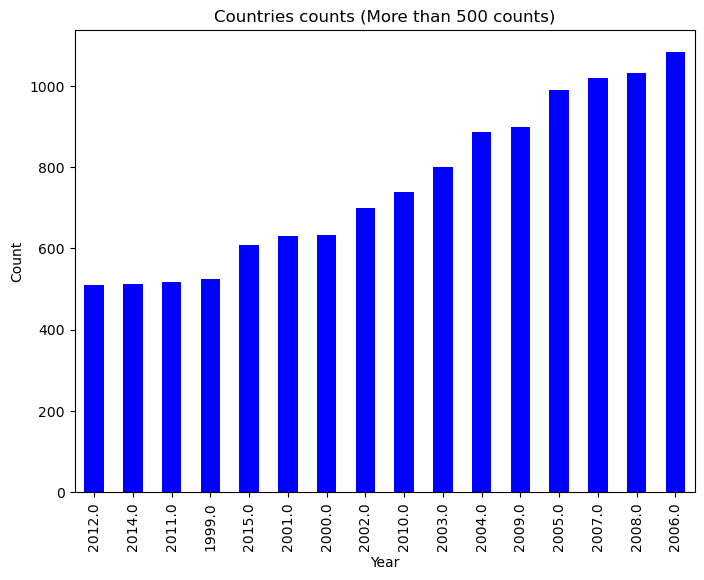

In [ ]:
df_copy = df_megaset.copy(deep=True)
df_years = df_copy.dropna(subset=['Year'])
print(df_years['Year'].max())

years_count = df_years['Year'].explode().value_counts().sort_values()
print(years_count)


df_years_count = years_count[years_count > count_threshold]
print(len(df_years_count))
print(f"Counts of Years")
colors = sns.color_palette("Set2", len(filt_countries_count))
plt.figure(figsize=(8, 6))
df_years_count.plot(kind='bar', color='blue')
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Genre Preference

Preferences in genre in US vs World for american movies (plotting the top genres based on foreign revenues vs domestic revenues)

Getting a list of all genres

In [18]:
df_megaset
all_genres = df_megaset['Genres'].str.split(', ').explode().value_counts()
top_20_genres = all_genres.head(20).index
top_20_genres

Index(['drama', 'comedy', 'romance film', 'black-and-white', 'action',
       'thriller', 'short film', 'world cinema', 'crime fiction', 'indie',
       'documentary', 'horror', 'silent film', 'adventure', 'family film',
       'action/adventure', 'comedy film', 'musical', 'animation',
       'romantic drama'],
      dtype='object', name='Genres')

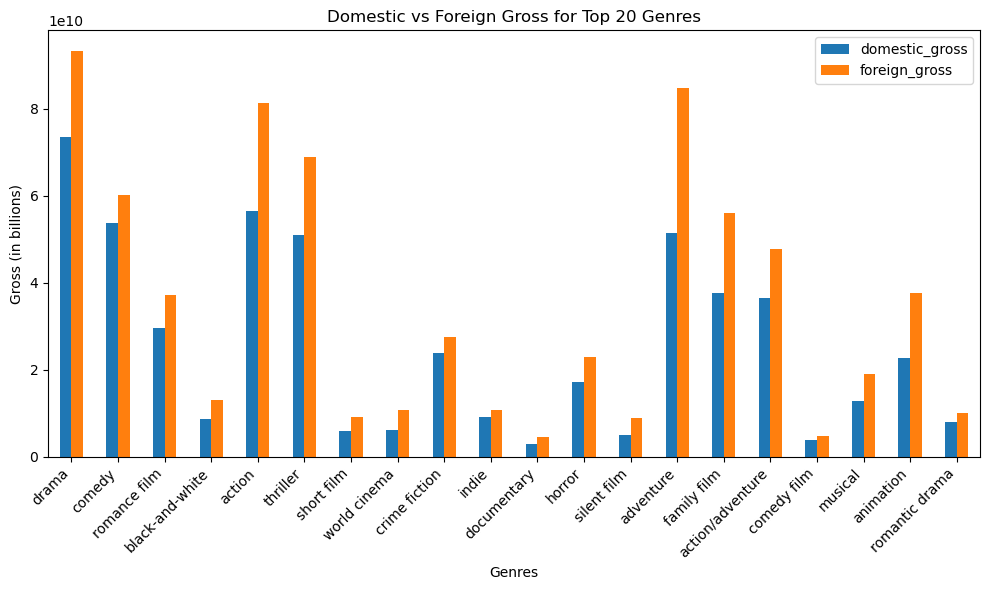

In [19]:
#Creating a new DataFrame excluding rows with NaN in relevant columns so it doesn't 
filtered_df = df_megaset.dropna(subset=['Genres', 'domestic_gross', 'foreign_gross'])

# Step 2: Initialize a dictionary to store gross for each genre
genre_gross = {genre: {'domestic_gross': 0, 'foreign_gross': 0} for genre in top_20_genres}

# Step 3: Iterate through the filtered dataset and sum gross for each genre
for idx, row in filtered_df.iterrows():
    genres = str(row['Genres']).split(', ')  # Split the genres of the current movie
    domestic = row['domestic_gross']
    foreign = row['foreign_gross']
    
    for genre in genres:
        # If the genre is in the top 20, add the gross to that genre
        if genre in top_20_genres:
            genre_gross[genre]['domestic_gross'] += domestic
            genre_gross[genre]['foreign_gross'] += foreign

# Step 4: Convert the dictionary into a DataFrame for easier plotting
df_genre_gross = pd.DataFrame(genre_gross).T  # Transpose to have genres as rows
df_genre_gross = df_genre_gross[['domestic_gross', 'foreign_gross']]  # Keep only the relevant columns

# Step 5: Plot the bar plot
df_genre_gross.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Domestic vs Foreign Gross for Top 20 Genres')
plt.ylabel('Gross (in billions)')
plt.xlabel('Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

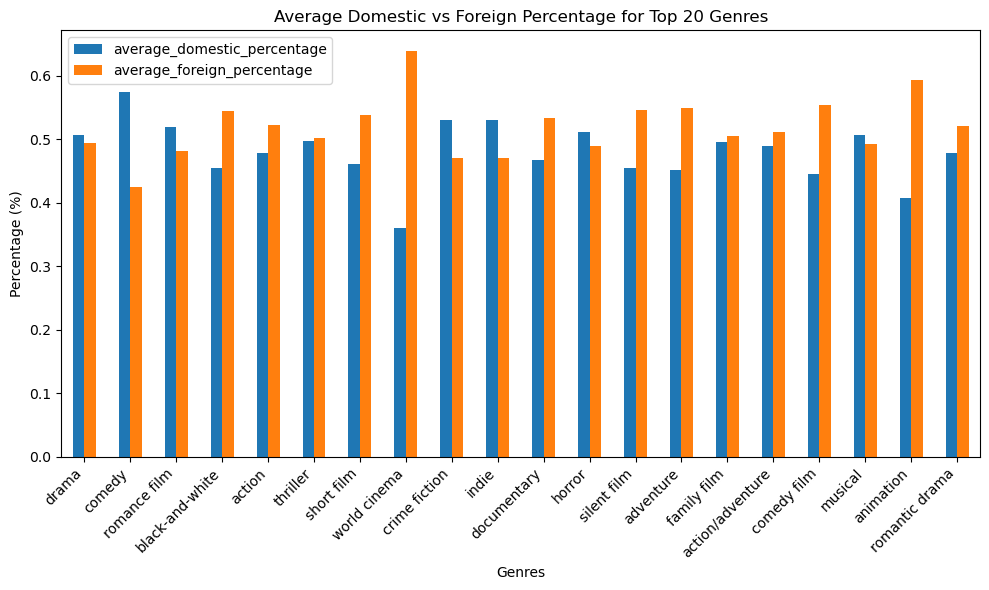

In [20]:
# Step 1: Create a new DataFrame excluding rows with NaN in relevant columns
filtered_df = df_megaset.dropna(subset=['Genres', 'domestic_percentage', 'foreign_percentage'])

# Step 2: Initialize a dictionary to store lists of percentages for each genre
genre_percentages = {genre: {'domestic_percentages': [], 'foreign_percentages': []} for genre in top_20_genres}

# Step 3: Iterate through the filtered dataset and collect percentages for each genre
for idx, row in filtered_df.iterrows():
    genres = str(row['Genres']).split(', ')  # Split the genres of the current movie
    domestic_percentage = row['domestic_percentage']
    foreign_percentage = row['foreign_percentage']
    
    for genre in genres:
        if genre in top_20_genres:  # If the genre is in the top 20
            genre_percentages[genre]['domestic_percentages'].append(domestic_percentage)
            genre_percentages[genre]['foreign_percentages'].append(foreign_percentage)

# Step 4: Calculate average percentages for each genre
genre_avg_percentages = {
    genre: {
        'average_domestic_percentage': (
            sum(genre_percentages[genre]['domestic_percentages']) /
            len(genre_percentages[genre]['domestic_percentages'])
            if genre_percentages[genre]['domestic_percentages'] else 0
        ),
        'average_foreign_percentage': (
            sum(genre_percentages[genre]['foreign_percentages']) /
            len(genre_percentages[genre]['foreign_percentages'])
            if genre_percentages[genre]['foreign_percentages'] else 0
        )
    }
    for genre in top_20_genres
}

# Step 5: Convert the dictionary into a DataFrame for easier plotting
df_genre_percentages = pd.DataFrame(genre_avg_percentages).T  # Transpose to have genres as rows
df_genre_percentages = df_genre_percentages[['average_domestic_percentage', 'average_foreign_percentage']]  # Keep only the relevant columns

# Step 6: Plot the bar plot
df_genre_percentages.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Average Domestic vs Foreign Percentage for Top 20 Genres')
plt.ylabel('Percentage (%)')
plt.xlabel('Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Trope Preference

Preferences in TV tropes in US vs World for american movies (rank tropes based on foreign revenues vs domestic revenues)

# Proportion of Domestic vs Foreign gross for US movies

Domestic vs Foreign Income, Total and Percentage, for American movies over time

In [22]:
year_min = df_megaset['Year'].min()
year_max = df_megaset['Year'].max()

print(f"The range of the 'Year' column is: {year_min} to {year_max}")

The range of the 'Year' column is: 1888.0 to 2024.0


In [23]:
df_gross = df_megaset.drop(columns=['Budget', 'Languages', 'Genres', 'Tropes'])
df_gross = df_gross[df_gross['Countries'].str.contains('united states', na=False)]
df_gross = df_gross.dropna()
df_gross

,Name,Year,Countries,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
2241,a star is born,1954.0,united states of america,215288866.0,0.493342,221100000.0,0.506658,4.363889e+08
3928,aladdin,1994.0,"united states of america, japan",355559216.0,0.338404,695134737.0,0.661596,1.050694e+09
4096,alice in wonderland,2010.0,united states of america,334191110.0,0.325884,691300000.0,0.674116,1.025491e+09
4097,alice in wonderland,1950.0,united states of america,334191110.0,0.325884,691300000.0,0.674116,1.025491e+09
4106,alice in wonderland,2010.0,united states of america,334191110.0,0.325884,691300000.0,0.674116,1.025491e+09
...,...,...,...,...,...,...,...,...
82202,up,1984.0,united states of america,293004164.0,0.398591,442094918.0,0.601409,7.350991e+08
82203,up,1984.0,united states of america,293004164.0,0.398591,442094918.0,0.601409,7.350991e+08
82657,vanity fair,1932.0,united states of america,16136476.0,0.829077,3326709.0,0.170923,1.946318e+07
82974,vice,2008.0,united states of america,47836282.0,0.628817,28237206.0,0.371183,7.607349e+07


The code below designs a histogram which gives the distribution of movies produced per year. 

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

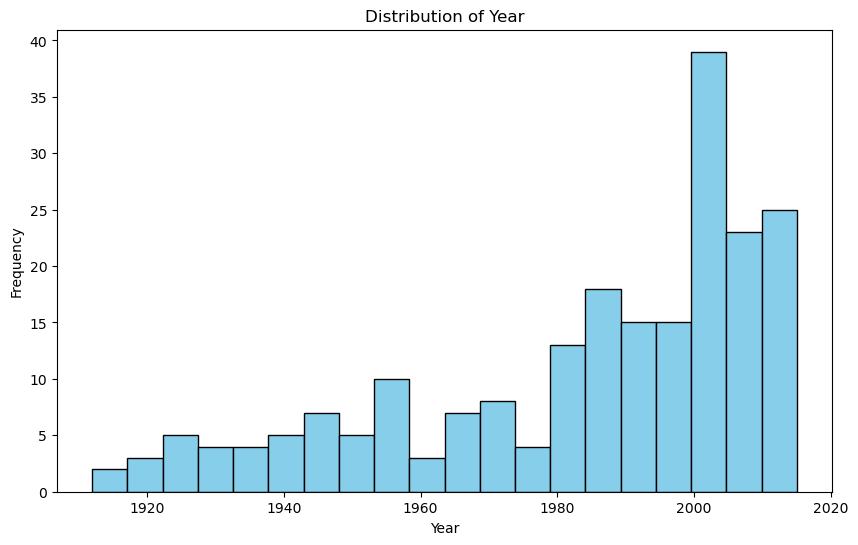

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_gross['Year'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid

The histogram demonstrates a clear bias in the dataset towards movies that were produced more recently, this could in large part be down to the increased collection of data once the information age arrived.

In [25]:
year_min = df_gross['Year'].min()
year_max = df_gross['Year'].max()

print(f"The range of the 'Year' column is: {year_min} to {year_max}")


The range of the 'Year' column is: 1912.0 to 2015.0


In order to see how the worldwide gross for US films has changed over time, we use a scatterplot for each of the American movies in our dataset.

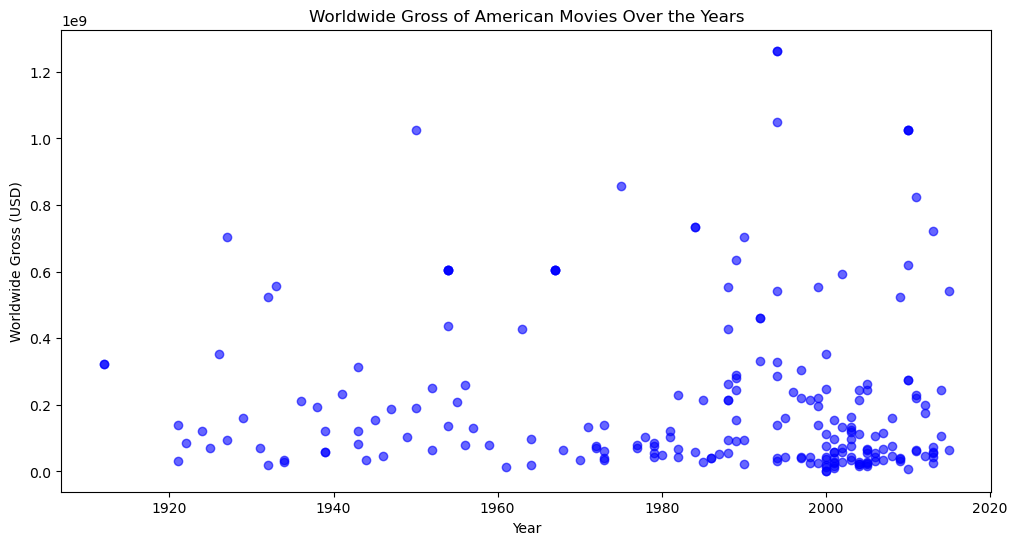

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df_gross['Year'], df_gross['worldwide_gross'], color='blue', alpha=0.6)

plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of American Movies Over the Years')

plt.show()

The scatterplot does not show any clear trend towards an overall increase in worldwide gross as we approach the present day despite factors like inflation which would have suggested an increase.

The bar chart featured below was created with the intent of checking the trends in average worldwide gross per year (from 2000 to 2016) with a domestic/foreign gross split.

In [ ]:
df_gross = df_gross[(df_gross['Year'] > 1999)&(df_gross['Year'] < 2017)]

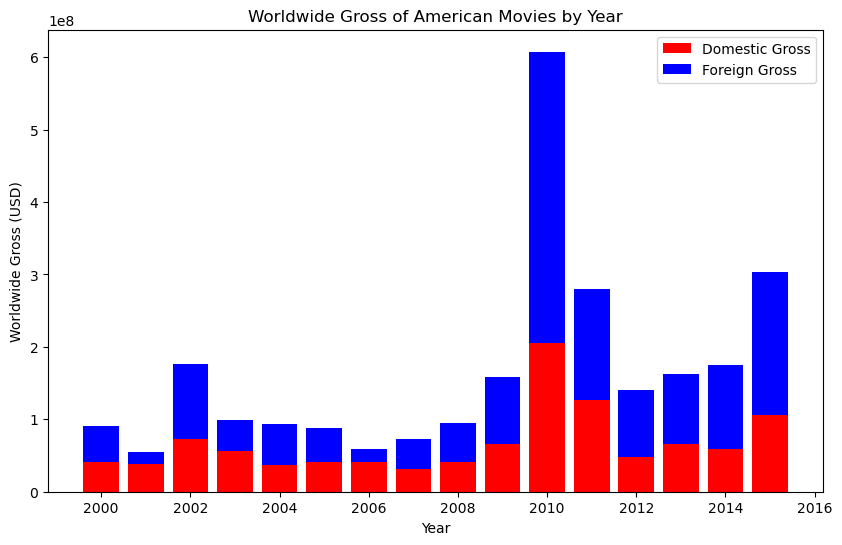

In [ ]:
yearly_data = df_gross.groupby('Year')[['domestic_gross', 'foreign_gross']].mean()

plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, yearly_data['domestic_gross'], color='red', label='Domestic Gross')
plt.bar(yearly_data.index, yearly_data['foreign_gross'], bottom=yearly_data['domestic_gross'], color='blue', label='Foreign Gross')

plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of American Movies by Year')
plt.legend()

plt.show()

As can be seen above, the gross overall has increased from 2010 onwards with in general the foreign gross outpacing the domestic gross.

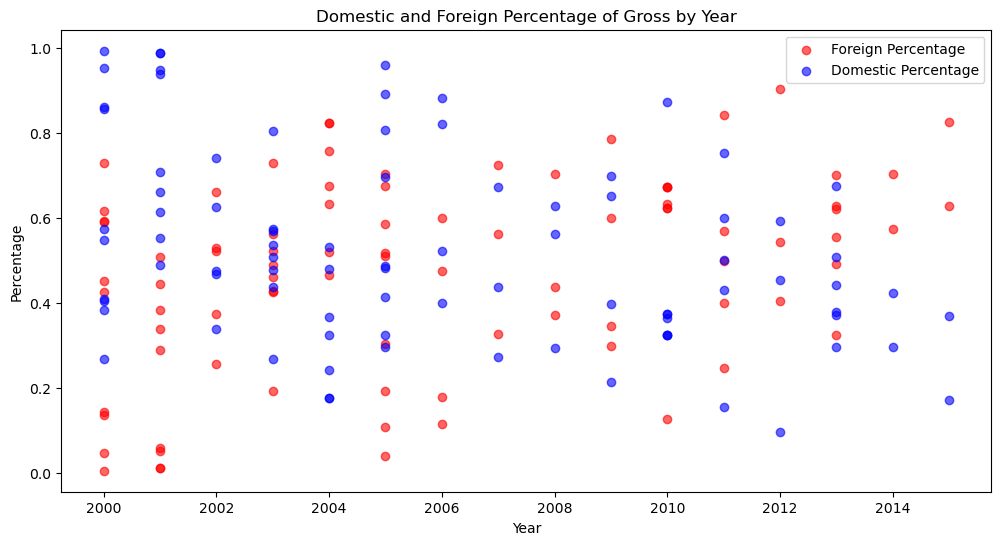

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(df_gross['Year'], df_gross['foreign_percentage'], color='red', label='Foreign Percentage', alpha=0.6)

plt.scatter(df_gross['Year'], df_gross['domestic_percentage'], color='blue', label='Domestic Percentage', alpha=0.6)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Domestic and Foreign Percentage of Gross by Year')
plt.legend()

plt.show()

The lineplots below were made to showcase how the share of domestic vs foreign income changes over time.

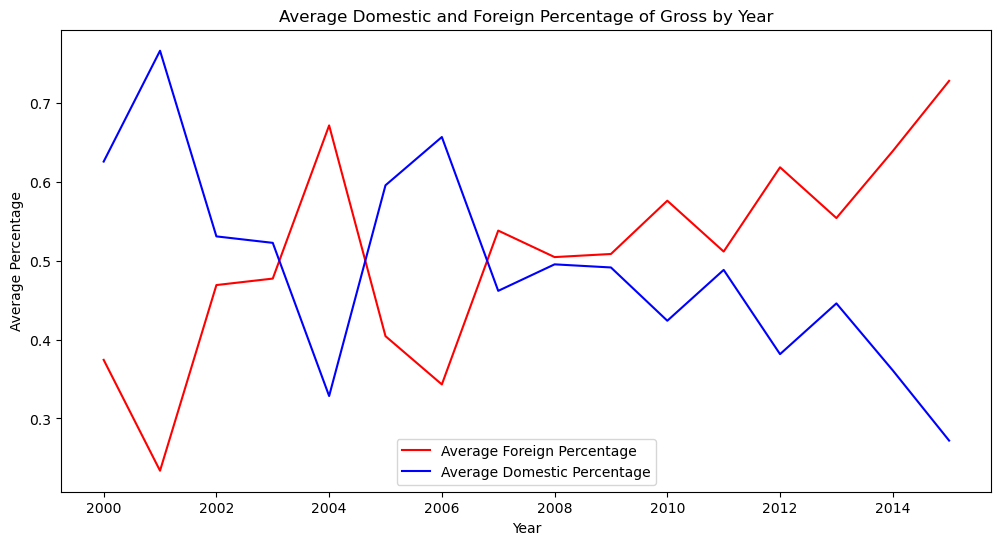

In [ ]:
average_percentages = df_gross.groupby('Year')[['foreign_percentage', 'domestic_percentage']].mean()

plt.figure(figsize=(12, 6))

plt.plot(average_percentages.index, average_percentages['foreign_percentage'], color='red', label='Average Foreign Percentage')

plt.plot(average_percentages.index, average_percentages['domestic_percentage'], color='blue', label='Average Domestic Percentage')

plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.title('Average Domestic and Foreign Percentage of Gross by Year')
plt.legend()

plt.show()

The graph above clearly shows that the domestic share of the total revenue has fallen from 2000 onwards, and consequentially the inverse is true for the foreign share.

# Budget Influence

Budget vs Foreign and Domestic Income for American Movies

In [ ]:
def remove_high_val(x):
    x = float(x)
    if x > 1:
        return False
    return True

initial length of the dataset: 87073
Length after removing all the Nans: 3001
-----------------------------------------------
Pearson coeff on budget and domestic
PearsonRResult(statistic=-0.3589762191031142, pvalue=5.838909427515045e-92)
Pearson coeff on budget and foreign
PearsonRResult(statistic=0.3589762191031142, pvalue=5.838909427515045e-92)


,Name,Budget,domestic_percentage,foreign_percentage
85,10 cloverfield lane,5000000.0,0.654010,0.345990
184,12 strong,35000000.0,0.644274,0.355726
188,12 years a slave,20000000.0,0.301875,0.698125
193,127 hours,18000000.0,0.301870,0.698130
204,13 going on 30,37000000.0,0.585487,0.414513


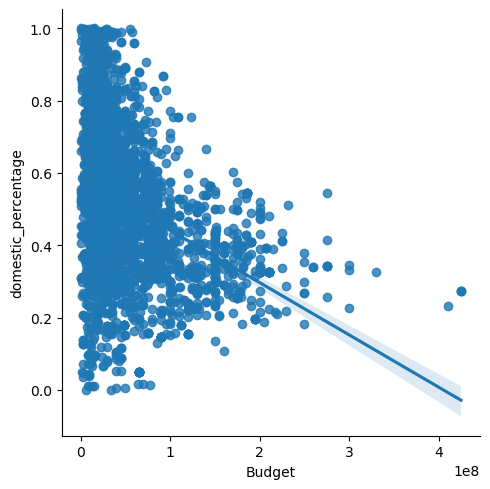

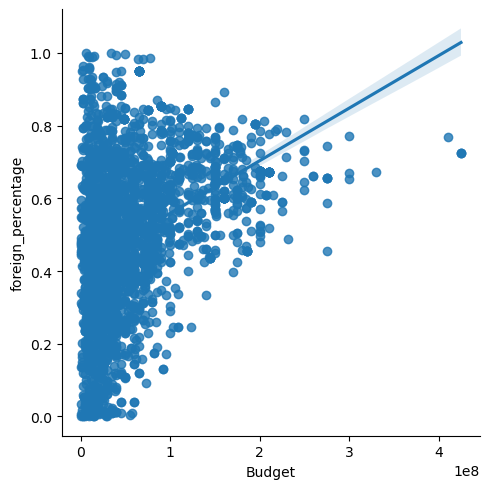

In [ ]:
import seaborn as sn
from statsmodels.stats import diagnostic
from scipy import stats

df_meg_copy = df_megaset.copy(deep=True)
df_meg_copy = df_meg_copy[['Name', 'Budget', 'domestic_percentage', 'foreign_percentage']]

print(f"initial length of the dataset: {len(df_meg_copy)}")

df_meg_copy = df_meg_copy[df_meg_copy['Budget'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['domestic_percentage'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['foreign_percentage'].notna()]

print(f"Length after removing all the Nans: {len(df_meg_copy)}")
print("-----------------------------------------------")
df_meg_copy = df_meg_copy[df_meg_copy.foreign_percentage < 1]

sn.lmplot(x='Budget',y='domestic_percentage', data=df_meg_copy)

print("Pearson coeff on budget and domestic")
print(stats.pearsonr(df_meg_copy['Budget'],df_meg_copy['domestic_percentage']))

sn.lmplot(x='Budget',y='foreign_percentage', data=df_meg_copy)
print("Pearson coeff on budget and foreign")
print(stats.pearsonr(df_meg_copy['Budget'],df_meg_copy['foreign_percentage']))
df_meg_copy.head()




The two graphs above show a correlation where as budget increases, the income percentage that comes from foreign markets increases while it decreases for domestic markets.